# Sensing Assignment 2 - Calculating Path Loss Exponent and Estimating Ranges

## Step 1 : Finding Path Loss Exponent

- With Wifi AP as transmitter and smartphone as reciever all the distance and RSSI readings have been recorded and updated into the variable "readings". 

- The 'polyfit' function of the numpy library is used to fit the best-fit line into the data.

- The slope and y-intercept of the best-fit line are returned by the polyfit function.

- Path loss exponent is found out by calculating absolute value of slope of line divided by 10

- Variance of original RSSI values with respect to the Best-fit line's Predicted RSSI values is calculated and printed


Distance to signal input data points are :  [[1, -45], [1, -41], [1, -43], [1, -46], [2, -52], [2, -49], [2, -53], [2, -51], [3, -62], [3, -58], [3, -60], [3, -59], [4, -66], [4, -64], [4, -65], [4, -67], [5, -72], [5, -74], [5, -71], [5, -73], [6, -80], [6, -78], [6, -82], [6, -81], [7, -87], [7, -88], [7, -85], [7, -86], [8, -90], [8, -91], [8, -89], [8, -93]]


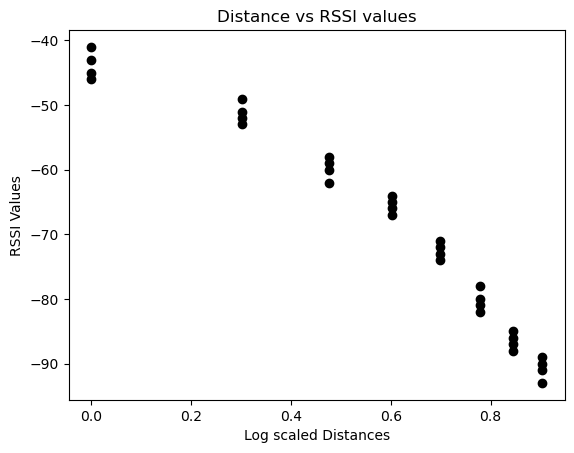

Slope of line is:  -53.23654363606305
Path Loss Exponent is:  5.3236543636063045


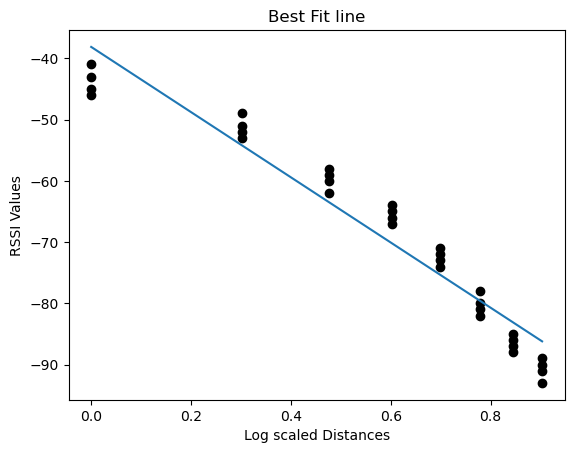

In [36]:
import numpy as np
import math
import matplotlib.pyplot as plt

# taking input of the distance to RSSI value pairs that are recorded through the application

readings = [[1,-45],[1,-41],[1,-43],[1,-46],[2,-52],[2,-49],[2,-53],[2,-51],[3,-62],[3,-58],[3,-60],
            [3,-59],[4,-66],[4,-64],[4,-65],[4,-67],[5,-72],[5,-74],[5,-71],[5,-73],[6,-80],[6,-78],
            [6,-82],[6,-81],[7,-87],[7,-88],[7,-85],[7,-86],[8,-90],[8,-91],[8,-89],[8,-93]]

print("Distance to signal input data points are : ",readings)

log_distances = []
RSSI_values= []

# input value pairs are splitted and added to the above lists through below for loop

for i in range(len(readings)):
    log_distances.append(math.log(readings[i][0],10)) #taking log base 10
    RSSI_values.append(readings[i][1])

# plotting the scatter plot for the input data    
plt.scatter(log_distances, RSSI_values, c ="black")
plt.xlabel('Log scaled Distances')
plt.ylabel('RSSI Values')
plt.title('Distance vs RSSI values')
plt.show()

# using the numpy library function polyfit to find the best fit line 

x = np.array(log_distances)
y = np.array(RSSI_values)

slope,c = np.polyfit(log_distances,RSSI_values,1)
plt.scatter(x, y, c ="black")
plt.xlabel('Log scaled Distances')
plt.ylabel('RSSI Values')
plt.title('Best Fit line')
plt.plot(x, slope*x+c)

print("Slope of line is: ",slope)

# Finding Path Loss Exponent

path_loss_exponent = abs(slope/10)
print("Path Loss Exponent is: ",path_loss_exponent)

In [37]:
# Finding variance between original RSSI values and the predicted RSSI values of Best fit line

predicted_RSSI = []
for i in range(len(log_distances)):
    predicted_RSSI.append(log_distances[i]*slope + c)

variance = 0
for i in range(len(RSSI_values)):
    variance = variance + pow((predicted_RSSI[i] - RSSI_values[i]),2)

variance = variance/(len(RSSI_values))

print("Variance is :",variance)

Variance is : 16.62921780420448


### Step 2: Range Estimation

- Sample test data is taken into variable "test_readings"

- By using the path loss exponent which we calculated earlier, d<sub>0</sub> as RSSI value at distance 1 meter the distances are estimated

- Rearranging the formula gives the formula to estimate the distance as :

    $ d = d_0 [10^{(P_r(d_0)[dBm] - P_r(d)[dBm])/10n }]$
    
- Predicted distances are calculated using the test readings

- Average distance error is calculated by taking the average of absolute difference between predicted and actual distances

In [38]:
# taking test data values

test_readings = [[1,-45],[8,-57],[10,-60],[15,-78],[30,-81]]
test_distances = []
test_RSSI_values = []
predicted_distances = []

# values added to the above lists in next for loops 
RSSI_value_at_dist_1 = readings[1][1]

# assuming d0 = 1 in the formula

for i in range(len(test_readings)):
    test_distances.append(math.log(test_readings[i][0],10))
    test_RSSI_values.append(test_readings[i][1])

# calculating the predicted distances

for i in range(len(test_distances)):
    temp = (RSSI_value_at_dist_1 - test_RSSI_values[i])/(10 * path_loss_exponent)
    predicted_distances.append(pow(10,temp))

print("Predicted distances based on the RSSI values is : ",predicted_distances)

Predicted distances based on the RSSI values is :  [1.188875447011233, 1.9977697458376658, 2.274561586550604, 4.9546309505353205, 5.641097158019576]


In [39]:
# Finding the average distance error
error = 0
test_distances_without_log = []

# taking the actual distances and predicted  distances without log
for i in range(len(test_readings)):
    test_distances_without_log.append(test_readings[i][0])

# finding average error    
for i in range(len(predicted_distances)):
    error = error + ( abs(predicted_distances[i] - test_distances_without_log[i]))
average_error = error/(len(predicted_distances))

print("Average distance error is : ",average_error)

Average distance error is :  9.664163201213613
